In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

from shapely.geometry import box

In [2]:
# display all column when looking at dataframes
pd.set_option("display.max.columns", None)

In [3]:
# states from Census TIGER files
states = gpd.read_file('tl_2022_us_state/tl_2022_us_state.shp')
states.columns = states.columns.str.lower()
print(states.crs)
states.head()

epsg:4269


,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


<AxesSubplot:>

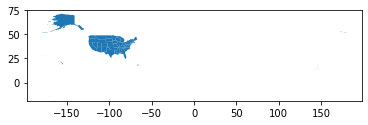

In [4]:
states.plot()

<AxesSubplot:>

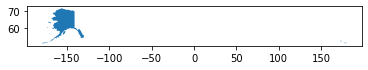

In [5]:
alaska = states[states.name =='Alaska']
alaska.plot()

<AxesSubplot:>

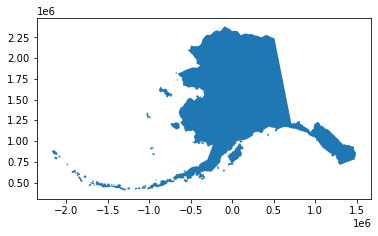

In [6]:
# change to projected CRS optimized for Alaska
alaska = alaska.to_crs('epsg:3338')
alaska.plot()

In [7]:
alaska.crs.is_projected

True

In [8]:
# Natural Earth Cultural medium scale places
# https://www.naturalearthdata.com/downloads/50m-cultural-vectors/
places = gpd.read_file('ne_50m_populated_places_simple/ne_50m_populated_places_simple.shp')
places.head()

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,capin,worldcity,megacity,sov0name,sov_a3,adm0name,adm0_a3,adm1name,iso_a2,note,latitude,longitude,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
0,10,1,5,Admin-1 region capital,Bombo,None,None,Bombo,0,0,None,0,0,Uganda,UGA,Uganda,UGA,Bamunanika,UG,None,0.583299,32.533300,75000,21000,0.0,8,7,None,None,7.0,1159113923,POINT (32.53330 0.58330)
1,10,1,5,Admin-1 region capital,Fort Portal,None,None,Fort Portal,0,0,None,0,0,Uganda,UGA,Uganda,UGA,Kabarole,UG,None,0.671004,30.275002,42670,42670,0.0,7,7,None,None,7.0,1159113959,POINT (30.27500 0.67100)
2,10,1,3,Admin-1 region capital,Potenza,None,None,Potenza,0,0,None,0,0,Italy,ITA,Italy,ITA,Basilicata,IT,None,40.642002,15.798997,69060,69060,0.0,8,8,None,None,7.0,1159117259,POINT (15.79900 40.64200)
3,10,1,3,Admin-1 region capital,Campobasso,None,None,Campobasso,0,0,None,0,0,Italy,ITA,Italy,ITA,Molise,IT,None,41.562999,14.655997,50762,50762,0.0,8,8,None,None,7.0,1159117283,POINT (14.65600 41.56300)
4,10,1,3,Admin-1 region capital,Aosta,None,None,Aosta,0,0,None,0,0,Italy,ITA,Italy,ITA,Valle d'Aosta,IT,None,45.737001,7.315003,34062,34062,0.0,7,7,None,None,7.0,1159117361,POINT (7.31500 45.73700)


<AxesSubplot:>

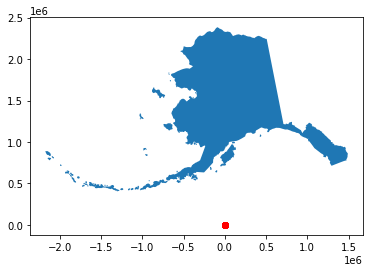

In [9]:
# Trouble: not in the same CRS
fig, ax = plt.subplots()

alaska.plot(ax=ax)
places.plot(ax=ax, color='red')

In [10]:
print(alaska.crs)
print(places.crs)

epsg:3338
epsg:4326


In [11]:
# update crs
places = places.to_crs(alaska.crs)
print(alaska.crs == places.crs)

True


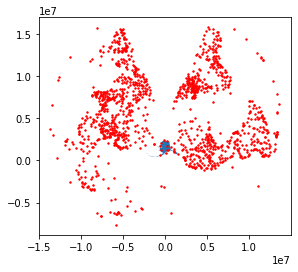

In [31]:
# this is intersting but now we are seeing all Arctic comms
fig, ax = plt.subplots()

alaska.plot(ax=ax)
places.plot(ax=ax, color='red',markersize=2 )
plt.show()

In [13]:
# clip places to Alaska
ak_places = gpd.clip(places, alaska)
ak_places

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,capin,worldcity,megacity,sov0name,sov_a3,adm0name,adm0_a3,adm1name,iso_a2,note,latitude,longitude,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
764,3,110,1,Populated place,Cold Bay,None,None,Cold Bay,0,0,None,0,0,United States,USA,United States of America,USA,Alaska,US,None,55.200001,-162.715092,200,108,0.0,1,1,None,Cold Bay,5.0,1159150541,POINT (-553201.466 612732.247)
763,3,110,1,Populated place,Kodiak,None,None,Kodiak,0,0,None,0,0,United States,USA,United States of America,USA,Alaska,US,None,57.789998,-152.406987,9461,6148,9122.0,5,5,None,Kodiak,5.0,1159150539,POINT (94470.762 866399.197)
215,4,50,1,Populated place,Sitka,None,None,Sitka,0,0,None,0,0,United States,USA,United States of America,USA,Alaska,US,None,57.060398,-135.327549,8931,7289,0.0,5,5,None,Sitka,5.1,1159149319,POINT (1115512.589 941665.222)
770,3,110,1,Admin-1 capital,Juneau,None,None,Juneau,0,0,None,0,0,United States,USA,United States of America,USA,Alaska,US,None,58.314127,-134.419997,30711,21633,0.0,7,7,None,Juneau,4.0,1159150555,POINT (1128929.841 1090424.979)
765,3,110,1,Populated place,Bethel,None,None,Bethel,0,0,None,0,0,United States,USA,United States of America,USA,Alaska,US,None,60.793303,-161.755796,6228,4653,0.0,5,4,None,Bethel,5.0,1159150543,POINT (-419821.224 1225558.907)
1080,2,200,1,Populated place,Anchorage,None,None,Anchorage,0,0,None,0,0,United States,USA,United States of America,USA,Alaska,US,None,61.219970,-149.900215,260283,243853,0.0,10,10,None,Anchorage,3.0,1159151249,POINT (220064.767 1254886.849)
769,3,110,1,Populated place,Valdez,None,None,Valdez,0,0,None,0,0,United States,USA,United States of America,USA,Alaska,US,None,61.135996,-146.348287,4036,2530,0.0,4,4,None,Valdez,5.0,1159150553,POINT (409805.897 1262980.440)
768,3,110,1,Populated place,Nome,None,None,Nome,0,0,None,0,0,United States,USA,United States of America,USA,Alaska,US,None,64.506100,-165.406374,3485,2557,2450.0,4,4,None,Nome,4.0,1159150551,POINT (-544875.137 1662874.547)
771,3,110,1,Populated place,Fairbanks,None,None,Fairbanks,0,0,None,0,0,United States,USA,United States of America,USA,Alaska,US,None,64.836984,-147.710659,56993,30224,0.0,8,7,None,Fairbanks,4.0,1159150557,POINT (297978.605 1666997.434)
766,3,110,1,Populated place,Point Hope,None,None,Point Hope,0,0,None,0,0,United States,USA,United States of America,USA,Alaska,US,None,68.347726,-166.808020,461,461,0.0,2,2,None,Point Hope,5.0,1159150547,POINT (-529220.980 2094066.281)


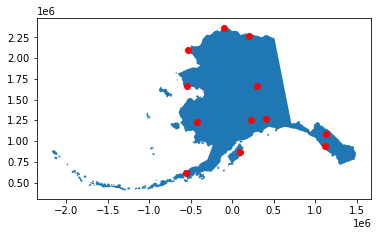

In [14]:
fig, ax = plt.subplots()

alaska.plot(ax=ax)
ak_places.plot(ax=ax, color='red')
plt.show()

In [15]:
# import natural earth 10m roads
# https://www.naturalearthdata.com/downloads/10m-cultural-vectors/roads/
roads = gpd.read_file('ne_10m_roads/ne_10m_roads.shp')
roads.head()

,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,question,length_km,toll,ne_part,label,label2,local,localtype,localalt,labelrank,ignore,add,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label,geometry
0,8,Road,Secondary Highway,CAN,None,"Version 1.5: Changed alignment, a few adds in ...",None,None,None,None,0,3,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,314705,North America,0,None,7.1,9.6,"LINESTRING (-133.32533 62.21571, -133.31664 62..."
1,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",83,None,None,None,0,164,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,108105,North America,0,Federal,7.0,8.6,"LINESTRING (-100.50543 42.80753, -100.53495 42..."
2,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",840,None,None,None,0,98,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,0,North America,0,U/C,7.0,9.5,"LINESTRING (-87.27432 36.02439, -87.22916 35.9..."
3,8,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",151,None,None,None,0,17,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,0,North America,0,Federal,7.1,9.6,"LINESTRING (-87.72757 44.15165, -87.57301 44.1..."
4,6,Road,Major Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",GSP,None,None,None,0,33,1,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,311305,North America,1,State,6.0,8.5,"MULTILINESTRING ((-74.75920 39.14301, -74.6735..."


<AxesSubplot:>

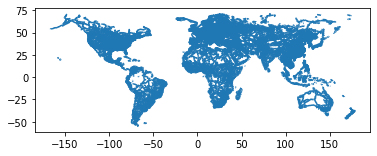

In [16]:
roads.plot()

In [17]:
# not in same CRS
print(alaska.crs)
print(roads.crs)

epsg:3338
epsg:4326


<AxesSubplot:>

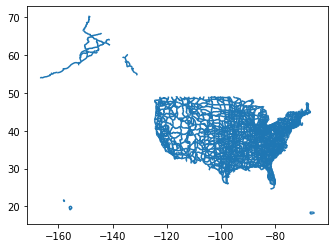

In [18]:
# geospatial operations are usually costly
# we should try to to reduce the data as much as possible beforehand
usa_roads = roads[roads.sov_a3 == 'USA']
usa_roads.plot()

In [19]:
ak_roads = gpd.clip(usa_roads.to_crs(alaska.crs),alaska)
ak_roads.head()

,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,question,length_km,toll,ne_part,label,label2,local,localtype,localalt,labelrank,ignore,add,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label,geometry
1078,7,Ferry,Ferry Route,USA,None,"Version 1.5: Changed alignment, a few adds in ...",None,None,None,None,0,111,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,308605,North America,0,Ferry,7.0,9.5,"LINESTRING (1386318.569 829171.762, 1396881.58..."
477,7,Ferry,Ferry Route,USA,None,"Version 1.5: Changed alignment, a few adds in ...",None,None,None,None,0,725,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,6905,North America,0,Ferry,7.0,9.5,"MULTILINESTRING ((-264845.282 715378.536, -246..."
3233,7,Ferry,Ferry Route,USA,None,New in version 2.0.0,None,None,None,None,0,1,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,308705,North America,0,Ferry,7.0,9.5,"LINESTRING (1385272.645 829831.314, 1386318.56..."
1057,8,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",None,None,None,None,0,63,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,0,North America,0,Other,7.1,9.6,"LINESTRING (79873.130 874903.558, 82789.958 86..."
1056,8,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",None,None,None,None,0,18,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,0,North America,0,Other,7.1,9.6,"LINESTRING (88344.609 863831.825, 89881.249 86..."


<AxesSubplot:>

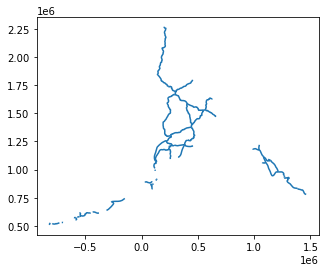

In [20]:
# notice how it breaks
# what we want is to clip to bounds
ak_roads.plot()

In [21]:
alaska.total_bounds

array([-2175729.73162241,   404545.10791528,  1493082.30904445,
        2383808.43520816])

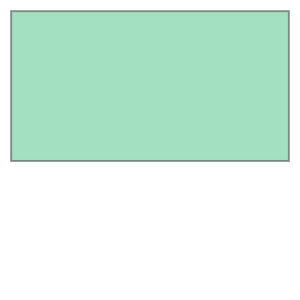

In [22]:
# explain the *
bbox = box(*alaska.total_bounds)
bbox

In [23]:
ak_bbox = gpd.GeoDataFrame(geometry=[bbox],
crs=alaska.crs)
ak_bbox

,geometry
0,"POLYGON ((1493082.309 404545.108, 1493082.309 ..."


<AxesSubplot:>

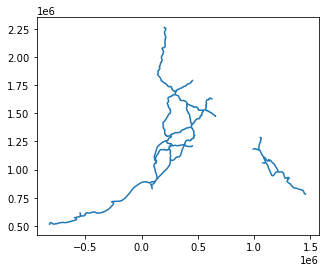

In [24]:
ak_complete_roads = gpd.clip(usa_roads.to_crs(ak_bbox.crs), ak_bbox)
ak_complete_roads.plot()

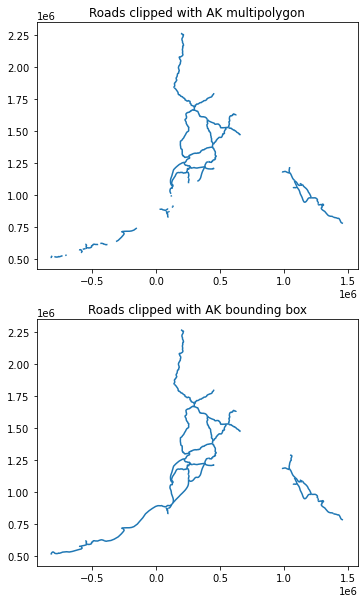

In [25]:
# two rows, one column
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

ak_roads.plot(ax=ax1)
ax1.set_title('Roads clipped with AK multipolygon')

ak_complete_roads.plot(ax=ax2)
ax2.set_title('Roads clipped with AK bounding box')

#plt.axis('equal')
plt.show()

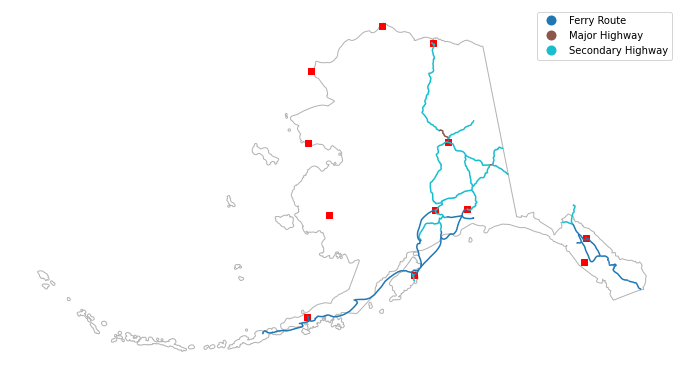

In [26]:
# https://matplotlib.org/stable/api/markers_api.html
# Trouble: not in the same CRS
# this is cool! but now we are seeing all Arctic comms
fig, ax = plt.subplots(figsize=(12,8))
# --------------------------
ax.axis('off')

alaska.plot(ax=ax, color='none', edgecolor='0.7')
ak_complete_roads.plot(ax=ax, column='type', legend=True)
#ak_comms.plot(ax=ax, color='red')
ak_places.plot(ax=ax, color='red', marker='s')

# --------------------------

plt.show()